In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from clean import clean_games

In [2]:
game_df = clean_games("data/games_scraped.pickle")

**Let's start by cutting our data down to start from 1990.**

This will make the below cells run faster, but also should prevent our model from putting too much emphasis on older years, since the game has changed so much since then.

In [ ]:
mask = game_df['year'] >= 1990
game_df = game_df[mask]
game_df

,team,year,team_year,date,opp,week_num,decade,game_day_of_week,game_outcome,team_record,pts_off,margin,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,game_time,overtime,team_home_game,to2_off,to2_def,game_id,result_tie,result_win,wins,losses,ties,prev_wins,prev_losses,prev_ties,prev_pts_off,prev_pts_def,prev_margin,prev_first_down_off,prev_yards_off,prev_pass_yds_off,prev_rush_yds_off,prev_to_off,prev_to2_off,prev_first_down_def,prev_yards_def,prev_pass_yds_def,prev_rush_yds_def,prev_to_def,prev_to2_def,prev_result_tie,roll3_num_ties,roll3_num_wins,prev_result_win,roll3_result_win,roll3_result_tie,roll3_pts_off,roll3_pts_def,roll3_margin,roll3_first_down_off,roll3_yards_off,roll3_pass_yds_off,roll3_rush_yds_off,roll3_to_off,roll3_to2_off,roll3_yards_def,roll3_pass_yds_def,roll3_rush_yds_def,roll3_to_def,roll3_to2_def,ewma_result_win,ewma_result_tie,ewma_pts_off,ewma_pts_def,ewma_margin,ewma_first_down_off,ewma_yards_off,ewma_pass_yds_off,ewma_rush_yds_off,ewma_to_off,ewma_to2_off,ewma_yards_def,ewma_pass_yds_def,ewma_rush_yds_def,ewma_to_def,ewma_to2_def,team_opp,opp_opp,prev_wins_opp,prev_losses_opp,prev_result_win_opp,prev_result_tie_opp,prev_ties_opp,prev_pts_off_opp,prev_pts_def_opp,prev_margin_opp,prev_first_down_off_opp,prev_yards_off_opp,prev_pass_yds_off_opp,prev_rush_yds_off_opp,prev_to_off_opp,prev_to2_off_opp,prev_first_down_def_opp,prev_yards_def_opp,prev_pass_yds_def_opp,prev_rush_yds_def_opp,prev_to_def_opp,prev_to2_def_opp,roll3_result_win_opp,roll3_result_tie_opp,roll3_result_tie_opp,roll3_pts_off_opp,roll3_pts_def_opp,roll3_margin_opp,roll3_first_down_off_opp,roll3_yards_off_opp,roll3_pass_yds_off_opp,roll3_rush_yds_off_opp,roll3_to_off_opp,roll3_to2_off_opp,roll3_yards_def_opp,roll3_pass_yds_def_opp,roll3_rush_yds_def_opp,roll3_to_def_opp,roll3_to2_def_opp,ewma_result_win_opp,ewma_result_win_opp,ewma_pts_off_opp,ewma_pts_def_opp,ewma_margin_opp,ewma_first_down_off_opp,ewma_yards_off_opp,ewma_pass_yds_off_opp,ewma_rush_yds_off_opp,ewma_to_off_opp,ewma_to2_off_opp,ewma_yards_def_opp,ewma_pass_yds_def_opp,ewma_rush_yds_def_opp,ewma_to_def_opp,ewma_to2_def_opp
347,crd,1990,crd-1990,1990-09-30,was,4,199,Sun,L,1-3,10.0,-28.0,38.0,13.0,192.0,80.0,112.0,1.0,26.0,436.0,257.0,179.0,0.0,8.0,NaN,1,1.0,0.0,crd-was-1990-09-30,0,0,1,3,0,1.0,2.0,0.0,7.0,28.0,-21.0,15.0,297.0,186.0,111.0,2.0,4.0,21.0,297.0,146.0,151.0,1.0,1.0,0.0,1.0,1.0,0.0,0.333,0.0,10.000,26.667,-16.667,16.333,275.000,160.333,114.667,2.667,10.000,323.667,199.333,124.333,1.333,3.333,0.332,0.0,10.257,26.557,-16.299,16.131,275.231,159.687,115.545,2.546,9.150,321.577,195.818,125.759,1.371,3.360,was,crd,2.0,1.0,1.0,0.0,0.0,19.0,15.0,4.0,11.0,214.0,135.0,79.0,1.0,1.0,19.0,234.0,143.0,91.0,3.0,9.0,0.667,0.0,0.0,21.000,13.667,7.333,15.333,296.333,201.667,94.667,0.333,0.333,338.333,246.333,92.000,3.000,11.667,0.668,0.668,20.521,14.259,6.263,14.999,290.717,197.653,93.064,0.376,0.376,335.450,243.338,92.112,2.922,11.029
348,crd,1990,crd-1990,1990-10-14,dal,6,199,Sun,W,2-3,20.0,17.0,3.0,23.0,414.0,191.0,223.0,2.0,9.0,100.0,34.0,66.0,3.0,4.0,NaN,1,4.0,9.0,crd-dal-1990-10-14,0,1,2,3,0,1.0,3.0,0.0,10.0,38.0,-28.0,13.0,192.0,80.0,112.0,1.0,1.0,26.0,436.0,257.0,179.0,0.0,0.0,0.0,1.0,1.0,0.0,0.333,0.0,13.333,29.000,-15.667,14.000,241.000,118.333,122.667,1.333,2.000,353.333,208.667,144.667,1.333,3.333,0.233,0.0,10.181,29.975,-19.794,15.196,250.370,135.884,114.486,2.084,6.715,355.755,214.093,141.662,0.961,2.357,dal,crd,2.0,3.0,1.0,0.0,0.0,14.0,10.0,4.0,19.0,304.0,149.0,155.0,1.0,1.0,12.0,271.0,164.0,107.0,1.0,1.0,0.333,0.0,0.0,15.333,20.000,-4.667,19.333,274.000,175.000,99.000,2.000,4.667,273.000,165.667,107.333,0.667,0.667,0.406,0.406,14.110,20.199,-6.089,16.719,251.609,166.145,85.465,2.138,5.851,281.817,167.850,113.968,1.278,2.627
349,crd,1990,crd-1990,1990-10-21,nyg,7,199,Sun,L,2-4,19.0,-1.0,20.0,14.0,221.0,96.0,125.0,0.0,18.0,321.0,164.0,157.0,2.0,4.0,NaN,0,0.0,4.0,crd-nyg-1990-10-21,0,0,2,4,0,2.0

In [4]:
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 73)

In [5]:
# print all columns
for col_name in game_df.columns:
    print(col_name)

team
year
team_year
date
opp
week_num
decade
game_day_of_week
game_outcome
team_record
pts_off
margin
pts_def
first_down_off
yards_off
pass_yds_off
rush_yds_off
to_off
first_down_def
yards_def
pass_yds_def
rush_yds_def
to_def
game_time
overtime
team_home_game
to2_off
to2_def
game_id
result_tie
result_win
wins
losses
ties
prev_wins
prev_losses
prev_ties
prev_pts_off
prev_pts_def
prev_margin
prev_first_down_off
prev_yards_off
prev_pass_yds_off
prev_rush_yds_off
prev_to_off
prev_to2_off
prev_first_down_def
prev_yards_def
prev_pass_yds_def
prev_rush_yds_def
prev_to_def
prev_to2_def
prev_result_tie
roll3_num_ties
roll3_num_wins
prev_result_win
roll3_result_win
roll3_result_tie
roll3_pts_off
roll3_pts_def
roll3_margin
roll3_first_down_off
roll3_yards_off
roll3_pass_yds_off
roll3_rush_yds_off
roll3_to_off
roll3_to2_off
roll3_yards_def
roll3_pass_yds_def
roll3_rush_yds_def
roll3_to_def
roll3_to2_def
ewma_result_win
ewma_result_tie
ewma_pts_off
ewma_pts_def
ewma_margin
ewma_first_down_off
ewma_

In [6]:
mask = (game_df.game_id == 'chi-gnb-1960-12-04')
game_df[mask][['game_id', 'team', 'opp', 'prev_rush_yds_off',
                 'prev_rush_yds_off_opp', 'roll3_margin', 'roll3_margin_opp']].head()

,game_id,team,opp,prev_rush_yds_off,prev_rush_yds_off_opp,roll3_margin,roll3_margin_opp


In [7]:
# construct a list containing all of the columns we could use in model
indicators = ['prev_', 'roll3', 'ewma_']
key_variables = [col for col in game_df.columns if col[:5] in indicators]
key_variables.sort()

additional = ['year', 'date', 'team', 'team_home_game', 'opp', 'margin']

for col in additional[::-1]:
    key_variables.insert(0, col)

key_variables

['year',
 'date',
 'team',
 'team_home_game',
 'opp',
 'margin',
 'ewma_first_down_off',
 'ewma_first_down_off_opp',
 'ewma_margin',
 'ewma_margin_opp',
 'ewma_pass_yds_def',
 'ewma_pass_yds_def_opp',
 'ewma_pass_yds_off',
 'ewma_pass_yds_off_opp',
 'ewma_pts_def',
 'ewma_pts_def_opp',
 'ewma_pts_off',
 'ewma_pts_off_opp',
 'ewma_result_tie',
 'ewma_result_win',
 'ewma_result_win_opp',
 'ewma_result_win_opp',
 'ewma_rush_yds_def',
 'ewma_rush_yds_def_opp',
 'ewma_rush_yds_off',
 'ewma_rush_yds_off_opp',
 'ewma_to2_def',
 'ewma_to2_def_opp',
 'ewma_to2_off',
 'ewma_to2_off_opp',
 'ewma_to_def',
 'ewma_to_def_opp',
 'ewma_to_off',
 'ewma_to_off_opp',
 'ewma_yards_def',
 'ewma_yards_def_opp',
 'ewma_yards_off',
 'ewma_yards_off_opp',
 'prev_first_down_def',
 'prev_first_down_def_opp',
 'prev_first_down_off',
 'prev_first_down_off_opp',
 'prev_losses',
 'prev_losses_opp',
 'prev_margin',
 'prev_margin_opp',
 'prev_pass_yds_def',
 'prev_pass_yds_def_opp',
 'prev_pass_yds_off',
 'prev_pass_y

In [8]:
for column_name in key_variables:
    print(column_name)

year
date
team
team_home_game
opp
margin
ewma_first_down_off
ewma_first_down_off_opp
ewma_margin
ewma_margin_opp
ewma_pass_yds_def
ewma_pass_yds_def_opp
ewma_pass_yds_off
ewma_pass_yds_off_opp
ewma_pts_def
ewma_pts_def_opp
ewma_pts_off
ewma_pts_off_opp
ewma_result_tie
ewma_result_win
ewma_result_win_opp
ewma_result_win_opp
ewma_rush_yds_def
ewma_rush_yds_def_opp
ewma_rush_yds_off
ewma_rush_yds_off_opp
ewma_to2_def
ewma_to2_def_opp
ewma_to2_off
ewma_to2_off_opp
ewma_to_def
ewma_to_def_opp
ewma_to_off
ewma_to_off_opp
ewma_yards_def
ewma_yards_def_opp
ewma_yards_off
ewma_yards_off_opp
prev_first_down_def
prev_first_down_def_opp
prev_first_down_off
prev_first_down_off_opp
prev_losses
prev_losses_opp
prev_margin
prev_margin_opp
prev_pass_yds_def
prev_pass_yds_def_opp
prev_pass_yds_off
prev_pass_yds_off_opp
prev_pts_def
prev_pts_def_opp
prev_pts_off
prev_pts_off_opp
prev_result_tie
prev_result_tie_opp
prev_result_win
prev_result_win_opp
prev_rush_yds_def
prev_rush_yds_def_opp
prev_rush_yds_o

Our DF is still too large to use `df.info()`.

Let's split the columns into sections. Since we have so many columns, we need to do quite a bit of splitting.

Let's start with a small selection of columns.

In [16]:
small_df = game_df[['margin', 'team', 'opp', 'game_id', 'year', 'roll3_margin',
                    'ewma_margin', 'roll3_to_off', 'roll3_to2_off', 'ewma_to_def', 'ewma_to2_def']]

In [9]:
indicators = ['prev_', 'roll3', 'ewma_']

prev_vars = [col for col in game_df.columns if col[:5] == 'prev_']
roll3_vars = [col for col in game_df.columns if col[:5] == 'roll3']
ewma_vars = [col for col in game_df.columns if col[:5] == 'ewma_']

for grp in [prev_vars, roll3_vars, ewma_vars]:
    for col in additional[::-1]:
        grp.insert(0, col)

prev_df = game_df[prev_vars]
roll3_df = game_df[roll3_vars]
ewma_df = game_df[roll3_vars]

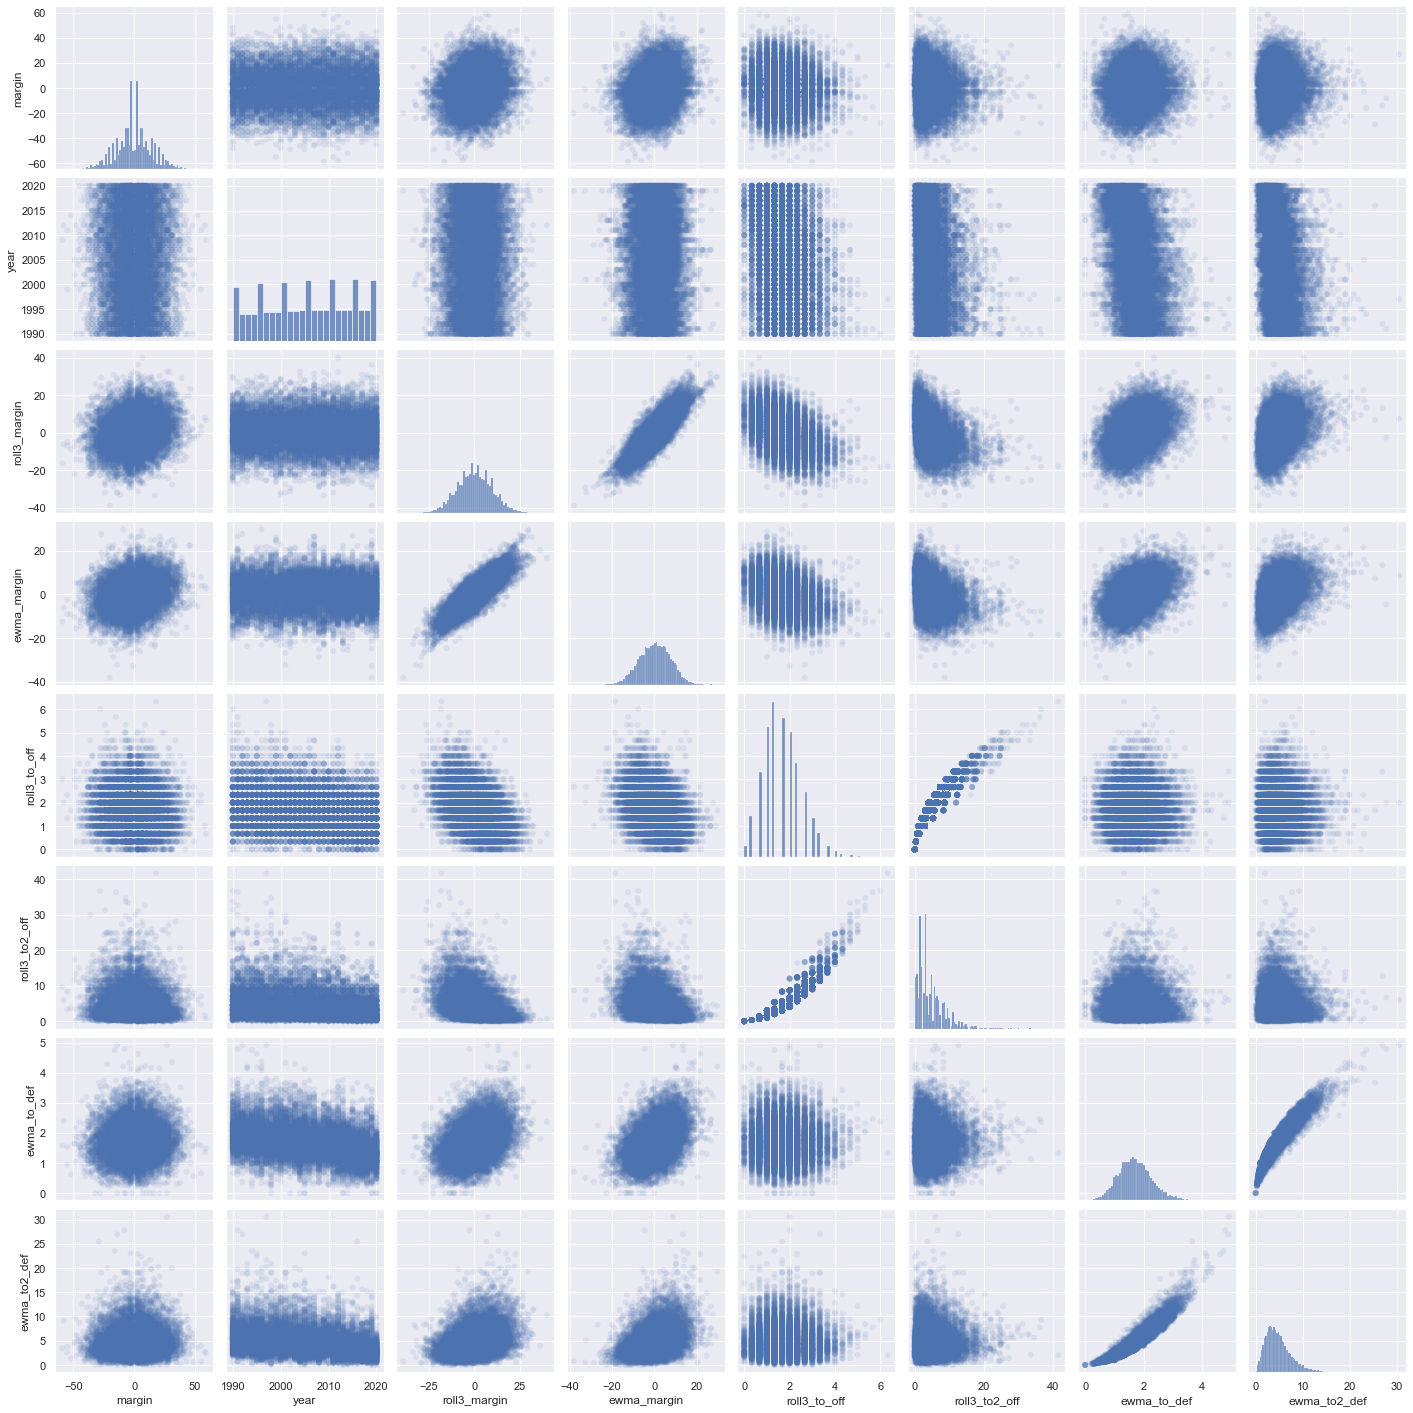

In [17]:
sns.pairplot(small_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
sns.pairplot(roll3_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
sns.pairplot(ewma_df, plot_kws=dict(alpha=.1, edgecolor='none'))